In [1]:
import pandas as pd
import pygraphviz as pgv
from IPython.display import Image

import warnings
from sys import path
import os
for dirname, _, filenames in os.walk('../resources/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
path.append(os.path.realpath('../'))

from custom import functions

warnings.filterwarnings('ignore')

../resources/allColProSol.xlsx
../resources/dataset_a_2021.csv
../resources/dataset_a_2021c2.csv
../resources/dataset_a_2021v1.xlsx
../resources/dataset_unab_ORIGINAL SIN P1.csv
../resources/dataset_unab_P1.csv
../resources/exitoFallidoEnviosProgramaSol.xlsx
../resources/exitoFallidoProgramaSol.xlsx
../resources/exitosoFallidosEnviosAllColProSol.xlsx
../resources/exitosoFallidosEnviosAllColSol.xlsx
../resources/exitososFallidosEnviosSol.xlsx
../resources/Hito12sinColCeroExitosoFallidosSol.xlsx
../resources/sinColCeroExitosoFallidosEnviosSol.xlsx
../resources/sinColCeroExitosoFallidosSol.xlsx
../resources/v2_hitosExitoFalloColESol1.csv
../resources/v2_hitosExitoFalloColESol1Prograna.csv
../resources/v2_hitosExitoFalloSol1Programa.csv
../resources/causalidad\causalidad.png
../resources/causalidad\causalidad2.dot
../resources/causalidad\causalidad_exitosos.dot
../resources/causalidad\causalidad_hito1.dot
../resources/causalidad\graph_exitosos.png
../resources/causalidad\graph_hito1.png


In [2]:
df = pd.read_csv("../resources/v2_hitosExitoFalloColESol1.csv", delimiter=";", skipinitialspace=True)

In [3]:
# Convertir la columna "sol1" a números de punto flotante
df['sol1'] = df['sol1'].astype(float)
df['exitosos'] = df['exitosos'].astype(int)
df['fallidos'] = df['fallidos'].astype(int)

In [4]:
#creando columna aprobado y con la funcion set_in_aprobado_nota poblamos la nueva columna.
df['aprobado']=df.apply(lambda x: functions.set_in_aprobado_nota(x['sol1']),axis = 1 )
# df["hito1_binario"] = df["hito1"].apply(lambda x: 1 if x > 0 else 0)
# df["hito2_binario"] = df["hito2"].apply(lambda x: 1 if x > 0 else 0)
# df["exitosos_binario"] = df["exitosos"].apply(lambda x: 1 if x > 0 else 0)
# df["fallidos_binario"] = df["fallidos"].apply(lambda x: 1 if x > 0 else 0)
#revisamos la existencia de la nueva columna.

print(df.columns)

Index(['hito1', 'hito2', 'exitosos', 'fallidos', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25',
       'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35',
       'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45',
       'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'sol1', 'aprobado',
       'hito1_binario', 'hito2_binario', 'exitosos_binario',
       'fallidos_binario'],
      dtype='object')


In [5]:
G = pgv.AGraph(directed=True)

In [6]:
for columna in df.columns:
    if columna.startswith('e29'):
        G.add_node(columna)
        G.add_edge(columna, 'exitosos')
    elif columna == 'exitosos':
        G.add_node(columna)
        G.add_edge(columna, 'hito1')
    elif columna == 'hito1':
        G.add_node(columna)
        G.add_edge(columna, 'hito2')
    elif columna == 'hito2':
        G.add_node(columna)
        G.add_edge(columna, 'aprobado')
    elif columna == 'aprobado':
        G.add_node(columna)

In [7]:
G.write('../resources/causalidad/causalidad.dot')

In [8]:
G.draw('../resources/causalidad/causalidad.png', prog='dot', format='png')

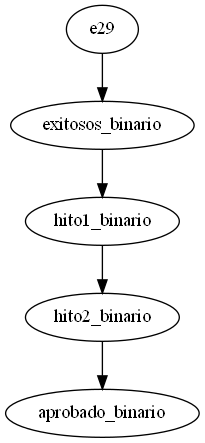

In [9]:
Image('../resources/causalidad/causalidad.png')
